In [ ]:
import torch.optim
import torch.nn.functional as F
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from models import RNN, GRU, LSTM, AttentionGRU
from synthetic_data import RandomSequenceDataset

In [ ]:
input_dimension = 4
hidden_dimension = 4
sequence_lengths = [1, 3, 5, 10, 20, 40, 100, 200, 400]
dev = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
def train_model(model, optimizer, sequence_length, dimension=input_dimension, batch_size=512):
    dataset = RandomSequenceDataset(dimension, sequence_length, batch_size)
    max_loss = 10
    num_epochs = 100
    epoch_size = 5
    best_loss = 1e10
    for epoch in range(num_epochs):
        average_loss = 0
        for i in range(epoch_size):
            x = dataset.get_batch().to(dev)
            y = x[0]
            y_h = model(x)
            loss = F.mse_loss(y_h, y)
            if np.isnan(loss.item()):
                average_loss += max_loss / epoch_size
                continue
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            average_loss += loss.clamp(0, max_loss).item() / epoch_size
        if average_loss < best_loss:
            best_loss = average_loss
    return best_loss

def plot_losses(losses, sequence_lengths):
    plt.plot(losses)
    plt.xlabel('Sequence Length')
    plt.xticks(range(len(sequence_lengths)), labels=sequence_lengths)
    plt.ylabel('MSE')
    plt.show()

opt = lambda model: torch.optim.Adam(model.parameters(), lr=0.1)


def memory_test(model_func, sequence_lengths):
    losses = []
    for sequence_length in sequence_lengths:
        model = model_func().to(dev)
        optimizer = opt(model)
        loss = train_model(model, optimizer, sequence_length=sequence_length)
        print(f'Sequence length: {sequence_length}, \t running average loss: {loss}')
        losses.append(loss)
    plot_losses(losses, sequence_lengths)

Sequence length: 1, 	 running average loss: 0.0001993501908145845
Sequence length: 3, 	 running average loss: 0.6683911204338074
Sequence length: 5, 	 running average loss: 0.9704343676567078
Sequence length: 10, 	 running average loss: 0.9728108286857604
Sequence length: 20, 	 running average loss: 0.9641595363616944
Sequence length: 40, 	 running average loss: 0.9650580286979674
Sequence length: 100, 	 running average loss: 0.9734944224357605
Sequence length: 200, 	 running average loss: 0.9685352683067321
Sequence length: 400, 	 running average loss: 0.974738872051239


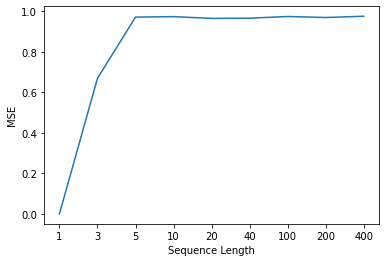

In [8]:
memory_test(lambda: RNN(input_dimension, hidden_dimension, input_dimension), sequence_lengths)

Sequence length: 1, 	 running average loss: 0.0015004011569544674
Sequence length: 3, 	 running average loss: 0.23563200235366819
Sequence length: 5, 	 running average loss: 0.001099903997965157
Sequence length: 10, 	 running average loss: 0.23872474431991575
Sequence length: 20, 	 running average loss: 0.2363008201122284
Sequence length: 40, 	 running average loss: 0.472773027420044
Sequence length: 100, 	 running average loss: 0.23855046331882473
Sequence length: 200, 	 running average loss: 0.9623865246772766
Sequence length: 400, 	 running average loss: 0.9697709202766418


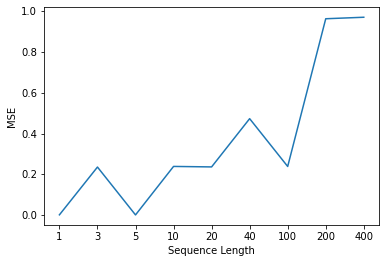

In [9]:
memory_test(lambda: GRU(input_dimension, hidden_dimension, input_dimension), sequence_lengths)

Sequence length: 1, 	 running average loss: 0.0020074039231985806
Sequence length: 3, 	 running average loss: 0.01373107582330704
Sequence length: 5, 	 running average loss: 0.2379937946796417
Sequence length: 10, 	 running average loss: 0.9667559385299682
Sequence length: 20, 	 running average loss: 0.9697404861450195
Sequence length: 40, 	 running average loss: 0.9639469385147095
Sequence length: 100, 	 running average loss: 0.9736590981483461
Sequence length: 200, 	 running average loss: 0.9738204002380371
Sequence length: 400, 	 running average loss: 0.9661004781723022


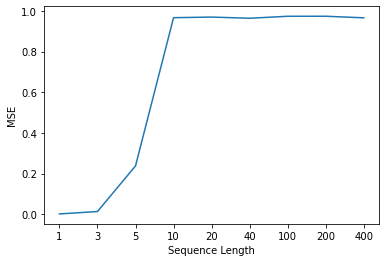

In [10]:
memory_test(lambda: LSTM(input_dimension, hidden_dimension, input_dimension), sequence_lengths)

In [ ]:
memory_test(lambda: AttentionGRU(input_dimension, hidden_dimension, input_dimension), sequence_lengths)